In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to MySQL
connection = mysql.connector.connect(
    host="127.0.0.1",       
    user="root",   # Your MySQL username
    password="W7301@jqir#", # Your MySQL password
    database="crimedb"
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [4]:
#create cursor object to execute sql queries
cursor = connection.cursor()

In [5]:
# Query the data from crime dataset
cursor.execute("SELECT * FROM crimedb.crime_dataset_india")

In [6]:
#After fetching data from the database we are storing it into Pandas DataFrame
crime_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [7]:
#printing first 5 records from table
print(crime_data.head())

      Date Reported Date of Occurrence Time of Occurrence       City  \
0  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11  Ahmedabad   
1  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26    Chennai   
2  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   Ludhiana   
3  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46       Pune   
4  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51       Pune   

   Crime Code Crime Description  Victim Age Victim Gender   Weapon Used  \
0         576    IDENTITY THEFT          16             M  Blunt Object   
1         128          HOMICIDE          37             M        Poison   
2         271        KIDNAPPING          48             F  Blunt Object   
3         170          BURGLARY          49             F       Firearm   
4         421         VANDALISM          30             F         Other   

    Crime Domain  Police Deployed Case Closed  Date Case Closed  
0  Violent Crime               13          No     

In [8]:
# print last 5 records from the data
print(crime_data.tail())

          Date Reported Date of Occurrence Time of Occurrence     City  \
40155  01-08-2024 16:00   07-31-2024 03:00   31-07-2024 05:05  Kolkata   
40156  31-07-2024 14:00   07-31-2024 04:00   31-07-2024 04:14   Mumbai   
40157  02-08-2024 03:00   07-31-2024 05:00   31-07-2024 21:33   Kanpur   
40158  01-08-2024 19:00   07-31-2024 06:00   31-07-2024 11:05    Patna   
40159  31-07-2024 17:00   07-31-2024 07:00   31-07-2024 17:19    Delhi   

       Crime Code   Crime Description  Victim Age Victim Gender   Weapon Used  \
40155         312      COUNTERFEITING          78             F       Firearm   
40156         300  ILLEGAL POSSESSION          75             F          None   
40157         423    VEHICLE - STOLEN          68             M         Other   
40158         311      SEXUAL ASSAULT          11             M  Blunt Object   
40159         193   DOMESTIC VIOLENCE          43             F        Poison   

        Crime Domain  Police Deployed Case Closed  Date Case Closed 

In [9]:
# print the information and data type of the dataset
print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date Reported       40160 non-null  object
 1   Date of Occurrence  40160 non-null  object
 2   Time of Occurrence  40160 non-null  object
 3   City                40160 non-null  object
 4   Crime Code          40160 non-null  int64 
 5   Crime Description   40160 non-null  object
 6   Victim Age          40160 non-null  int64 
 7   Victim Gender       40160 non-null  object
 8   Weapon Used         40160 non-null  object
 9   Crime Domain        40160 non-null  object
 10  Police Deployed     40160 non-null  int64 
 11  Case Closed         40160 non-null  object
 12  Date Case Closed    40160 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.0+ MB
None


In [10]:
#print the size of the data
print(crime_data.shape)

(40160, 13)


# Data Cleaning

In [11]:
# Check for missing values
print(crime_data.isnull().sum())
crime_data.dropna(inplace=True)

Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
dtype: int64


In [12]:
# Check and remove duplicates
print(crime_data.duplicated().sum())
crime_data.drop_duplicates(inplace=True)

0


In [13]:
#crime_data = crime_data.iloc[:-10000]
#print(crime_data.shape)

# Exploratory Data Analysis

In [14]:
print(crime_data.columns)

Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed',
       'Date Case Closed'],
      dtype='object')


In [15]:
# Remove leading/trailing spaces
crime_data.columns = crime_data.columns.str.strip()

In [16]:
print(crime_data.columns)

Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed',
       'Date Case Closed'],
      dtype='object')


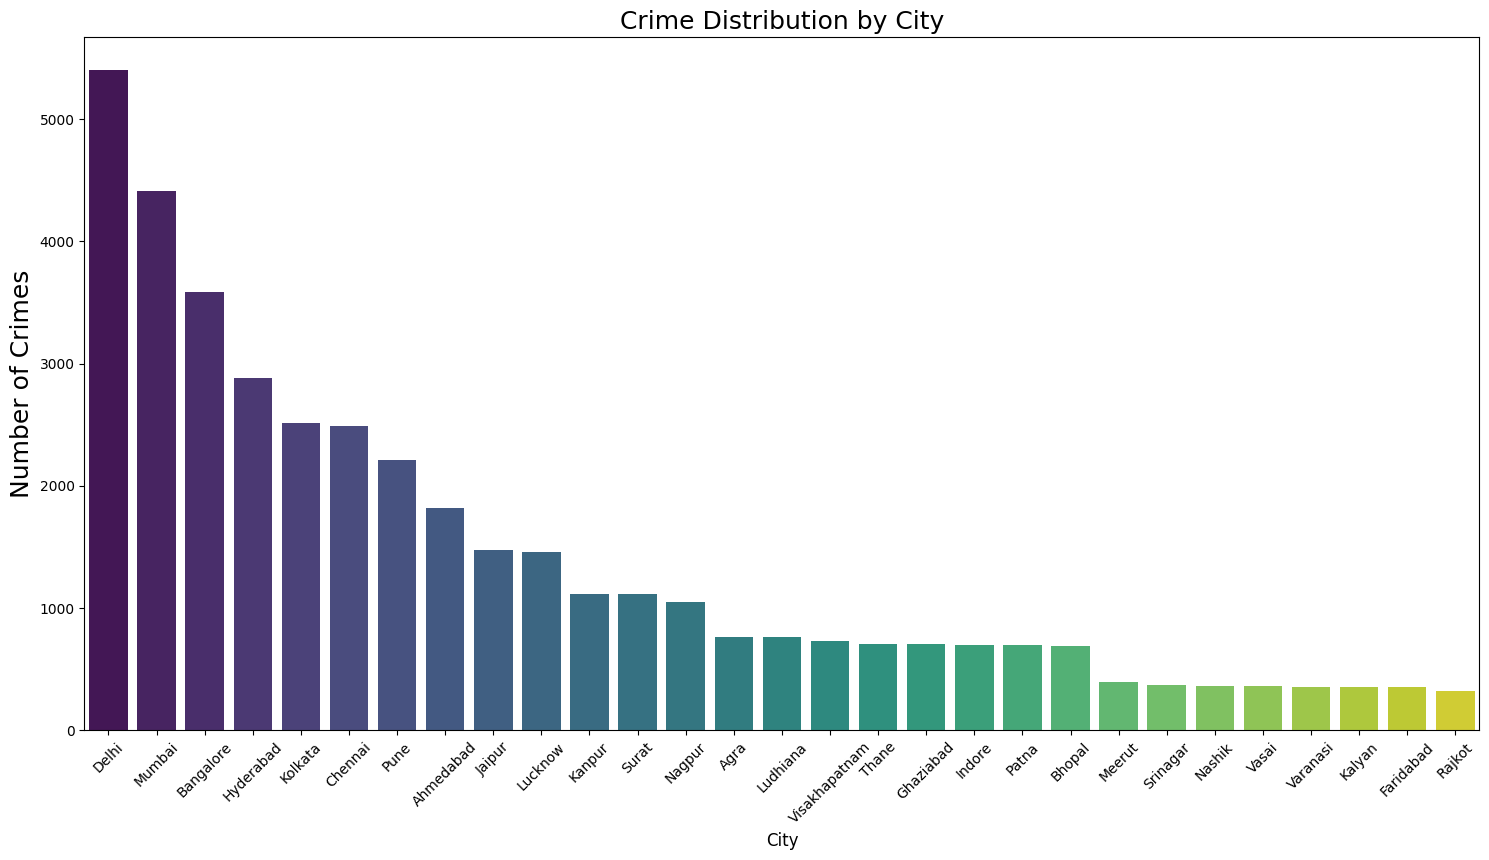

In [17]:
#Which city reports the highest number of crimes?
# Count number of crimes per city
city_crime_counts = crime_data['City'].value_counts()

# Convert to DataFrame
city_crime_counts_df = city_crime_counts.reset_index()
city_crime_counts_df.columns = ['City', 'Crime Count']

# Plot the bar chart
plt.figure(figsize=(18, 9))
sns.barplot(data=city_crime_counts_df, x='City', y='Crime Count', hue='City', dodge=False, palette="viridis")
plt.title("Crime Distribution by City", fontsize=18)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=18)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hide unnecessary legend
plt.show()


C:\Users\Rhea\AppData\Local\Temp\ipykernel_17000\876176220.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = filtered_data.groupby(['Crime Description', 'Age Group']).size().unstack()


<Figure size 1200x800 with 0 Axes>

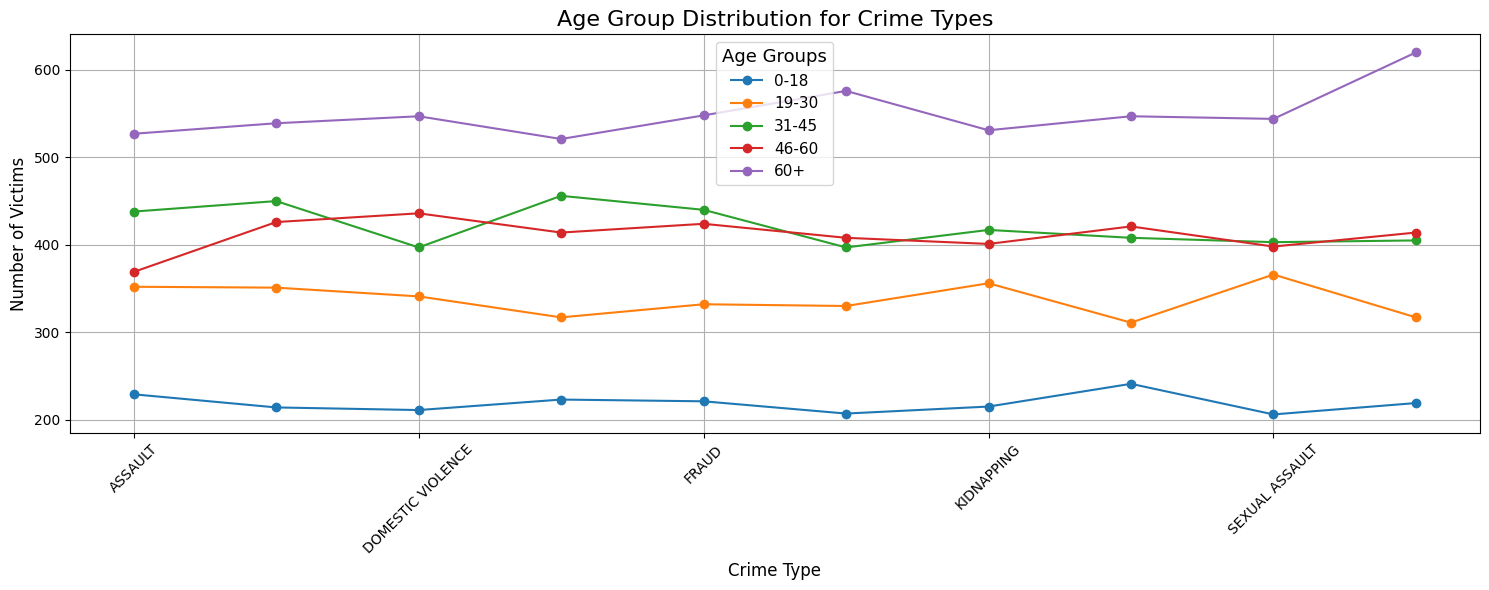

In [18]:
#What is the age distribution of victims according to crime types?
# Categorize the 'Victim Age' into age groups
bins = [0, 18, 30, 45, 60, 100]  # Define age bins
labels = ['0-18', '19-30', '31-45', '46-60', '60+']  # Labels for the bins
crime_data['Age Group'] = pd.cut(crime_data['Victim Age'], bins=bins, labels=labels, right=False)

# Filter the top 10 crime types
top_10_crime_data = crime_data['Crime Description'].value_counts().head(10).index
filtered_data = crime_data[crime_data['Crime Description'].isin(top_10_crime_data)]

# Count the number of victims in each age group for each crime type
age_group_counts = filtered_data.groupby(['Crime Description', 'Age Group']).size().unstack()

# Plot line plot
plt.figure(figsize=(12, 8))
age_group_counts.plot(kind='line', marker='o', figsize=(15, 6))

# Title and labels
plt.title("Age Group Distribution for Crime Types", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Victims", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  # Add grid to the plot
plt.legend(title="Age Groups", title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

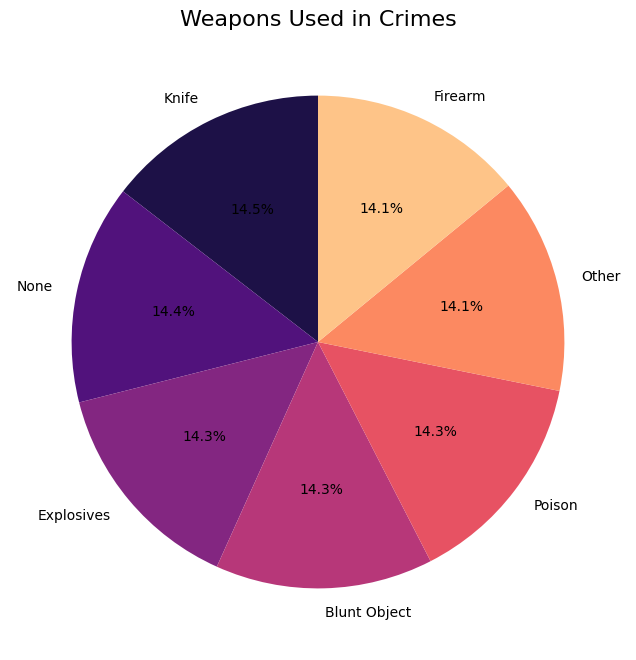

In [19]:
#Which weapons are most commonly used in crimes?
# Weapon counts
weapon_counts = crime_data['Weapon Used'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    weapon_counts, 
    labels=weapon_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("magma", len(weapon_counts))
)
plt.title("Weapons Used in Crimes", fontsize=16)
plt.show()

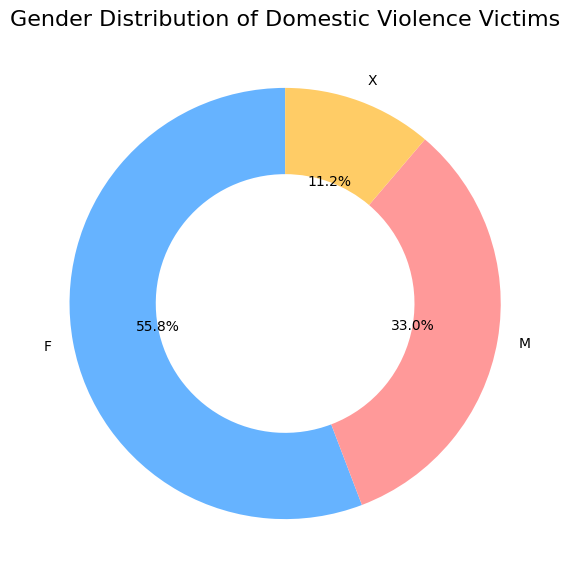

In [20]:
#What is the gender distribution of victims in Domestic Violence cases?
# Filter the dataset for 'Domestic Violence' crime type
domestic_violence = crime_data[crime_data['Crime Description'] == 'DOMESTIC VIOLENCE']

# Count the number of male, female, and 'X' victims in 'Domestic Violence'
victim_gender_domestic_violence = domestic_violence['Victim Gender'].value_counts()

# Create the donut chart
plt.figure(figsize=(7, 7))
plt.pie(victim_gender_domestic_violence, labels=victim_gender_domestic_violence.index, autopct='%1.1f%%', 
        startangle=90, colors=["#66b3ff", "#ff9999", "#ffcc66"], wedgeprops={'width': 0.4})
plt.title("Gender Distribution of Domestic Violence Victims", fontsize=16)
plt.show()

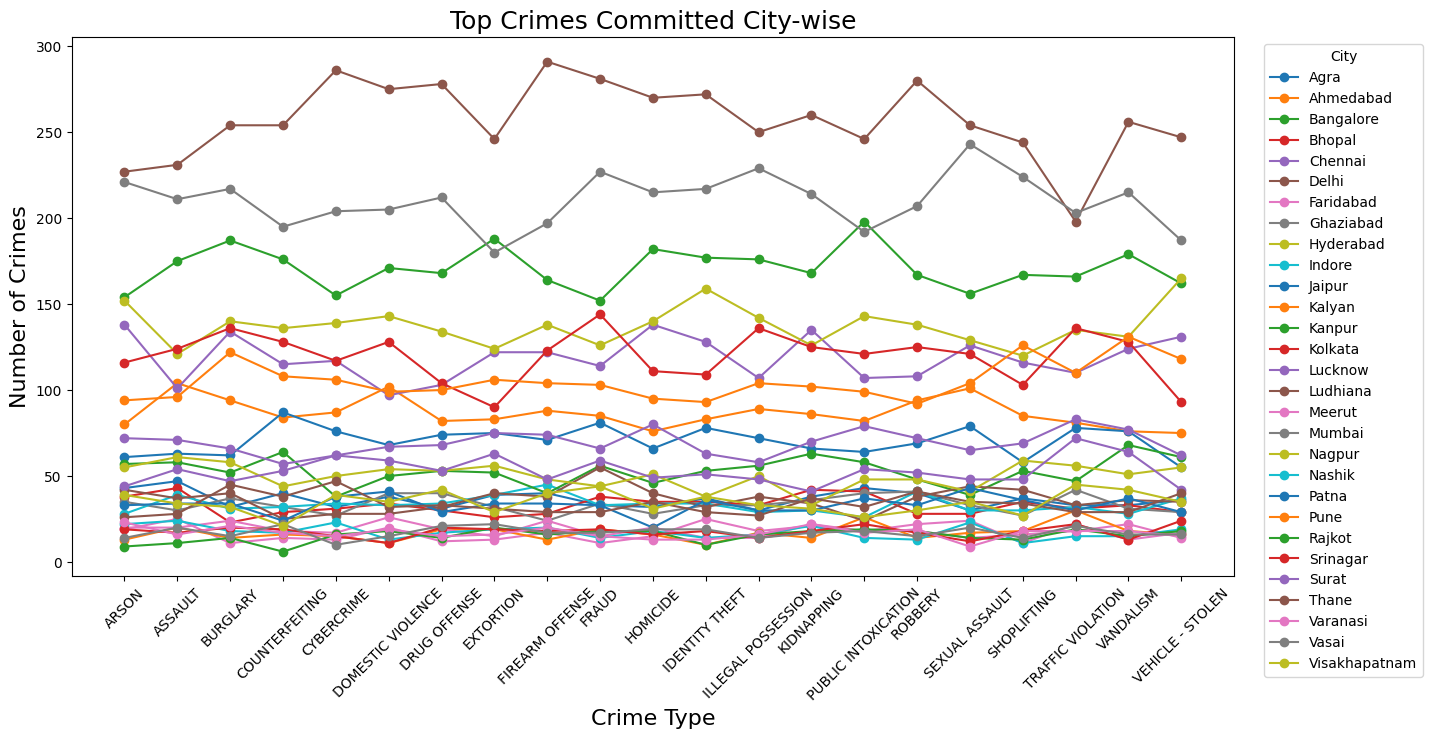

In [43]:
#What are the most commonly committed crimes in each city?
# Group by City and Crime Type to get the count of crimes
top_crimes_per_city = crime_data.groupby(['City', 'Crime Description']).size().reset_index(name='Crime Count')

# Sort by Crime Count to ensure the correct crime type is shown as the highest
top_crimes_per_city_sorted = top_crimes_per_city.sort_values(by='Crime Count', ascending=False)

# Pivot table for city-wise crime data
crime_pivot = top_crimes_per_city_sorted.pivot_table(index='City', columns='Crime Description', values='Crime Count', aggfunc='sum', fill_value=0)

# Dot plot to visualize the highest crime type per city
plt.figure(figsize=(15, 7))

# Loop through each city and plot the crimes with dots
for i, city in enumerate(crime_pivot.index):
    plt.plot(crime_pivot.columns, crime_pivot.loc[city], marker='o', label=city)

plt.title("Top Crimes Committed City-wise", fontsize=18)
plt.xlabel("Crime Type", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="City", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


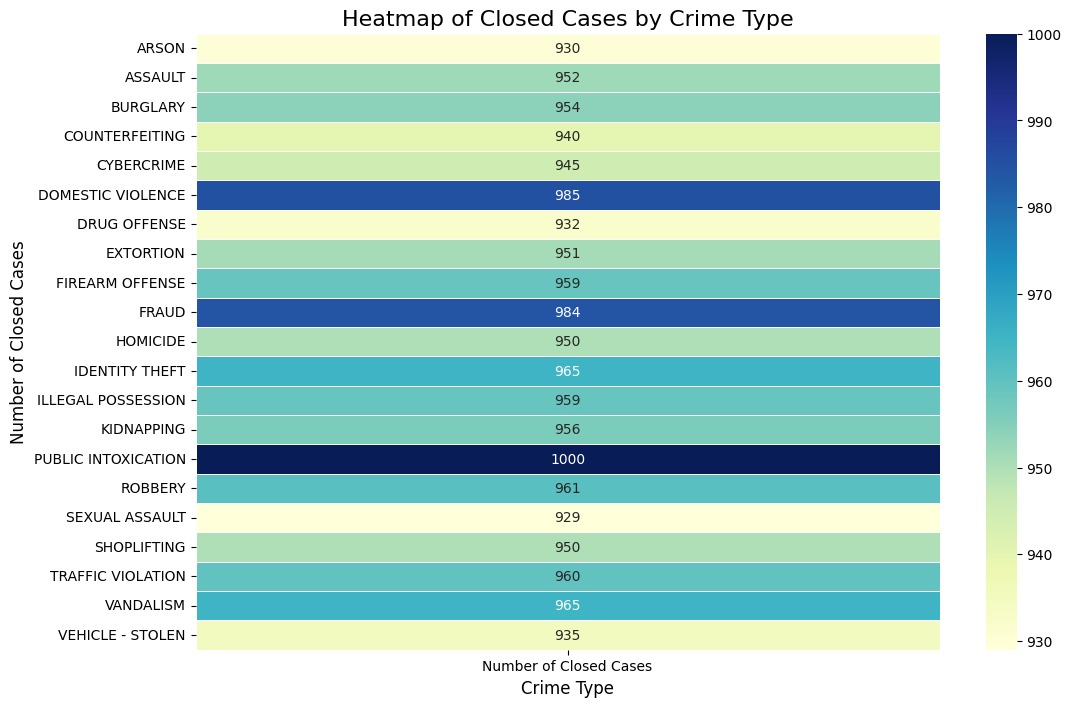

In [38]:
#What types of crimes are most commonly closed in the dataset?
# Filter for closed cases
closed_cases = crime_data[crime_data['Case Closed'] == 'Yes']

# Count the number of closed cases for each crime type
crime_type_closed_cases = closed_cases['Crime Description'].value_counts().reset_index()
crime_type_closed_cases.columns = ['Crime Description', 'Number of Closed Cases']


# Pivot table for the heatmap
crime_type_closed_cases_pivot = crime_type_closed_cases.pivot_table(
    values='Number of Closed Cases', 
    index='Crime Description'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_type_closed_cases_pivot, annot=True, fmt='.0f', cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("Heatmap of Closed Cases by Crime Type", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Closed Cases", fontsize=12)
plt.show()


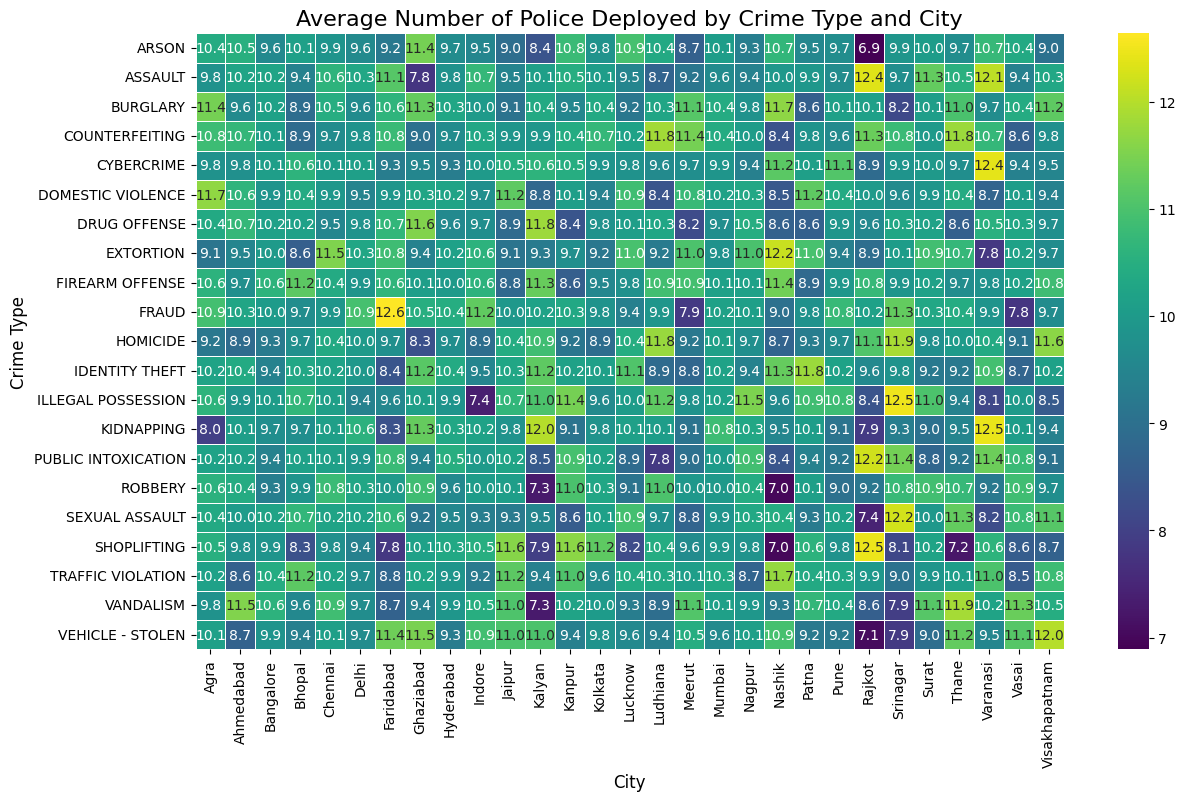

In [28]:
#What is the average number of police deployed for each crime type?
crime_police_deployed_avg = crime_data.groupby('Crime Description')['Police Deployed'].mean()

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
crime_police_deployed_avg.plot(kind='bar', stacked=True, color=sns.color_palette("viridis", len(crime_police_deployed_avg)))
plt.title("Number of Police Deployed by Crime Type", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Police Deployed", fontsize=12)
plt.xticks(rotation=45)
plt.show()

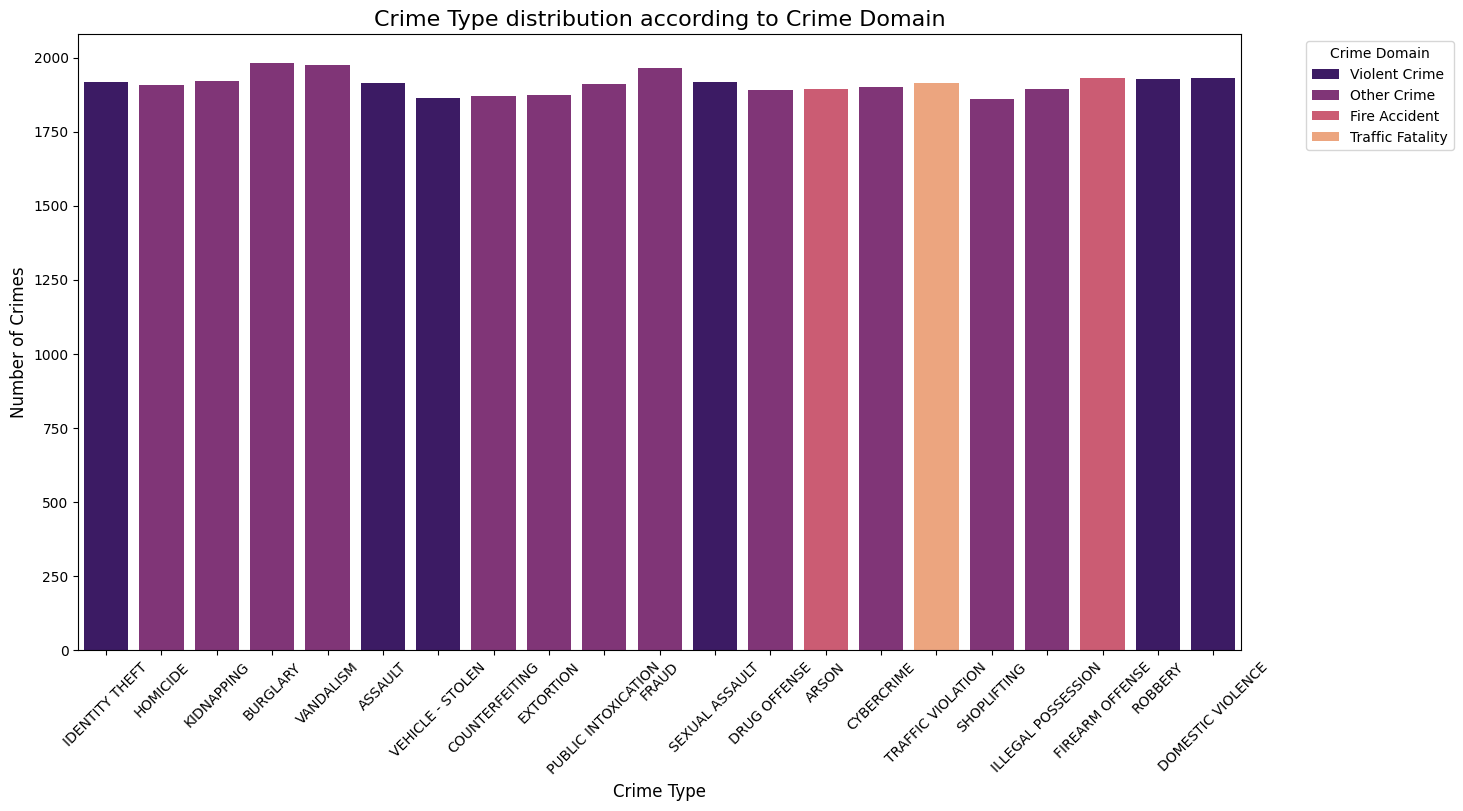

In [24]:
#How are different crime types distributed across crime domains?
# Plot countplot for crime type vs crime domain
plt.figure(figsize=(15, 8))
sns.countplot(data=crime_data, x='Crime Description', hue='Crime Domain', palette="magma")
plt.title("Crime Type distribution according to Crime Domain", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Crime Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Rhea\AppData\Local\Temp\ipykernel_17000\4049843245.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_blunt_object.values, y=crime_type_blunt_object.index, palette="muted")


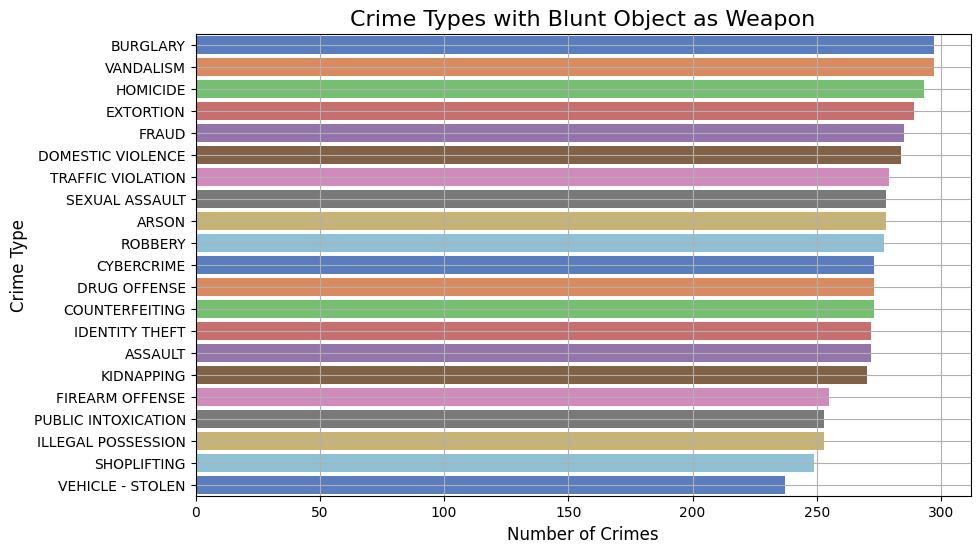

In [27]:
#Which crime type most commonly involve blunt objects as weapons?
# Filter the dataset for crimes where the weapon used was a 'Blunt Object'
blunt_object_crimes = crime_data[crime_data['Weapon Used'] == 'Blunt Object']

# Count the number of crimes for each crime type where blunt object was used
crime_type_blunt_object = blunt_object_crimes['Crime Description'].value_counts()

# Plot horizontal bar chart for crime types with blunt object as weapon
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_type_blunt_object.values, y=crime_type_blunt_object.index, palette="muted")
plt.title("Crime Types with Blunt Object as Weapon", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.grid(True)
plt.show()


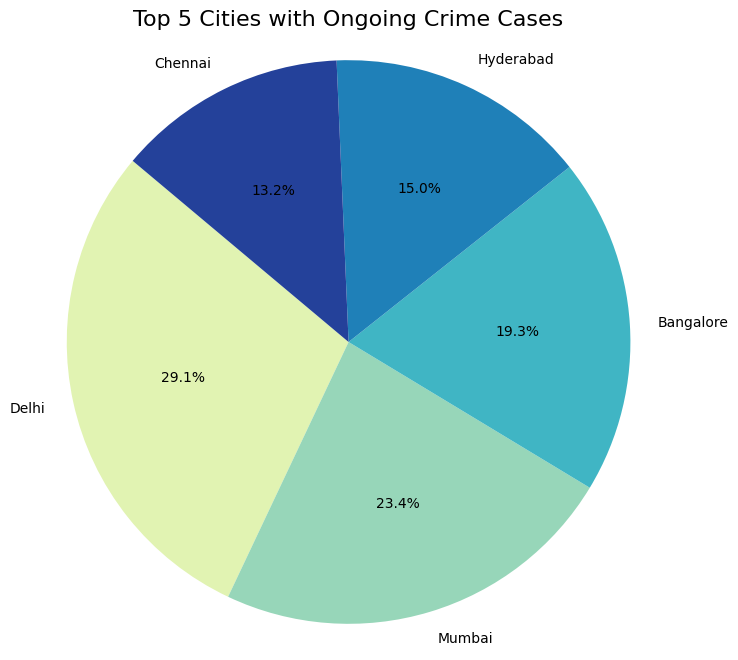

In [26]:
#Which are the top 5 cities where crime cases are open?
# Filter the dataset for open cases (where 'Case Closed' is 'No')
open_cases = crime_data[crime_data['Case Closed'] == 'No']

# Count the number of open cases in each city and select the top 5 cities
open_cases_by_city = open_cases['City'].value_counts().head(5)

# Convert the Series to a DataFrame for easier manipulation
open_cases_by_city_df = open_cases_by_city.reset_index()
open_cases_by_city_df.columns = ['City', 'Open Cases']

# Plot pie chart for top 5 cities with most open cases
plt.figure(figsize=(8, 8))
plt.pie(open_cases_by_city.values, labels=open_cases_by_city.index, autopct='%1.1f%%', colors=sns.color_palette("YlGnBu", len(open_cases_by_city)), startangle=140)
plt.title("Top 5 Cities with Ongoing Crime Cases", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


# Conclusion
### The analysis of crime data across different cities reveals several key patterns and trends that offer valuable insights into the nature of crime in the dataset. 

## 1.The analysis of crime data across different cities reveals several key patterns and trends that offer valuable insights into the nature of crime in the dataset.

## 2.The analysis of domestic violence cases shows that females are predominantly the victims. 

## 3.Among the various crime types, cybercrime emerges as a significant concern in Delhi. With the rise of technology, internet connectivity, and digital transactions, cybercrime continues to expand.

## 4.Despite having a high number of resolved cases, Delhi also has the most number of open cases. This may reflect delays in the investigative process or challenges in solving complex cases. More resources may be required to address this backlog.

## 5.One of the most striking findings is that public intoxication cases have the highest closure rate among all crime types in the dataset. This high closure rate indicates that law enforcement agencies may be more efficient at handling these incidents compared to others.